In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Setting time horizon and given stock

start = "2012-01-01"
end = "2022-12-21"
stock = "AMZN"

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
#Checking first 10 rows of the data

data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.7945,8.9740,8.7775,8.9515,8.9515,102216000
2012-01-04,8.9605,9.0250,8.8035,8.8755,8.8755,84104000
2012-01-05,8.7970,8.9125,8.7025,8.8805,8.8805,76182000
2012-01-06,8.9035,9.2325,8.8750,9.1305,9.1305,140168000
2012-01-09,9.1380,9.2185,8.8500,8.9280,8.9280,101138000
2012-01-10,9.0550,9.1200,8.8550,8.9670,8.9670,79716000
2012-01-11,8.9820,9.0385,8.9095,8.9450,8.9450,62054000
2012-01-12,8.9710,8.9745,8.7875,8.7965,8.7965,107716000
2012-01-13,8.7905,8.9400,8.6750,8.9210,8.9210,95070000


In [4]:
#Reseting the index to enumerate days
data.reset_index(inplace=True)

In [5]:
#Checking again to see the changes

data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,8.7945,8.9740,8.7775,8.9515,8.9515,102216000
1,2012-01-04,8.9605,9.0250,8.8035,8.8755,8.8755,84104000
2,2012-01-05,8.7970,8.9125,8.7025,8.8805,8.8805,76182000
3,2012-01-06,8.9035,9.2325,8.8750,9.1305,9.1305,140168000
4,2012-01-09,9.1380,9.2185,8.8500,8.9280,8.9280,101138000
5,2012-01-10,9.0550,9.1200,8.8550,8.9670,8.9670,79716000
6,2012-01-11,8.9820,9.0385,8.9095,8.9450,8.9450,62054000
7,2012-01-12,8.9710,8.9745,8.7875,8.7965,8.7965,107716000
8,2012-01-13,8.7905,8.9400,8.6750,8.9210,8.9210,95070000
9,2012-01-17,9.0075,9.1650,8.9255,9.0830,9.0830,112890000


In [6]:
#Adding new variable -  moving average from 100 last days

ma_100_days = data.Close.rolling(100).mean()

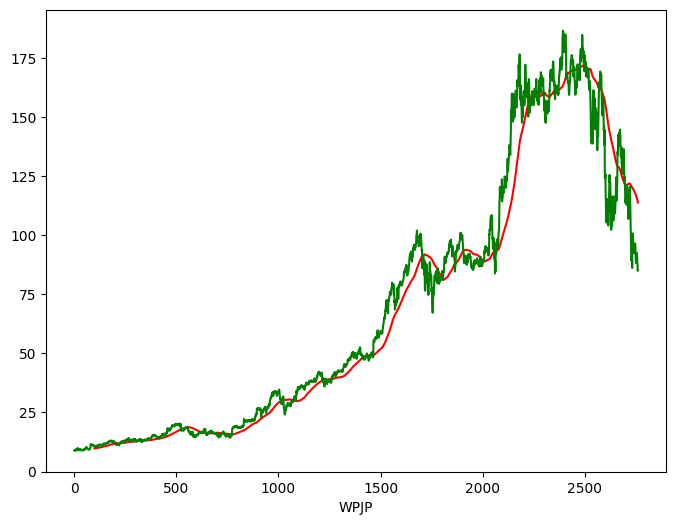

In [7]:
#Chart to demonstrate ma_100_days vs original data

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.xlabel("WPJP")
plt.plot(data.Close,"g")
plt.show()

In [8]:
#Another variable - moving average from 200 last days

ma_200_days = data.Close.rolling(200).mean()

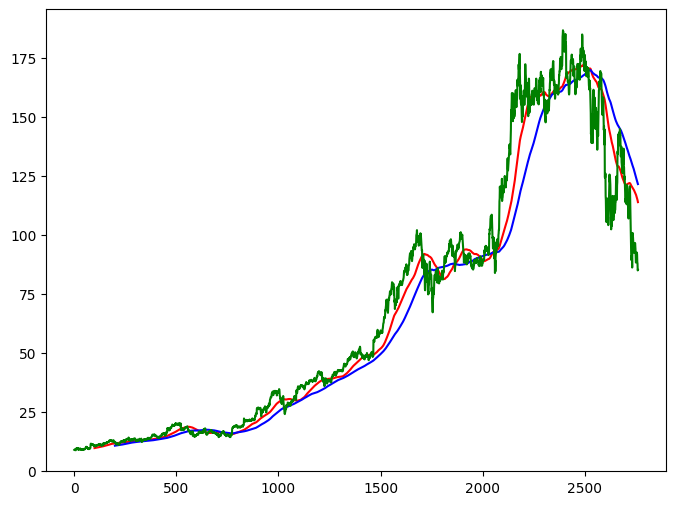

In [9]:
#Ploting again

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(ma_200_days, "b")
plt.plot(data.Close, "g")
plt.show()

In [10]:
#Data pre-processing, dividing the data set to the train and test groups

data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2208

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_train_scaled = scaler.fit_transform(data_train)

In [14]:
x=[]
y=[]

for i in  range(100,data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

In [15]:
x,y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True,
              input_shape = ((x.shape[1],1))))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\Piotr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer = "adam",loss = "mean_squared_error")

In [19]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - loss: 0.0422
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0051
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0034
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0037
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0031
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0032
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0032
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0030
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0026
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0024
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0031
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0026
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0024
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0024
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
past_100_days = data_train.tail(100)

In [22]:
data_test_combined = pd.concat([past_100_days, data_test], ignore_index=True)

In [23]:
data_test_scaled  =  scaler.transform(data_test_combined)

In [24]:
x_test = []
y_test = []

for i in range(100, data_test_scaled.shape[0]):
    x_test.append(data_test_scaled[i-100:i])
    y_test.append(data_test_scaled[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [25]:
y_predict_scaled = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


In [26]:
y_predict = scaler.inverse_transform(y_predict_scaled)

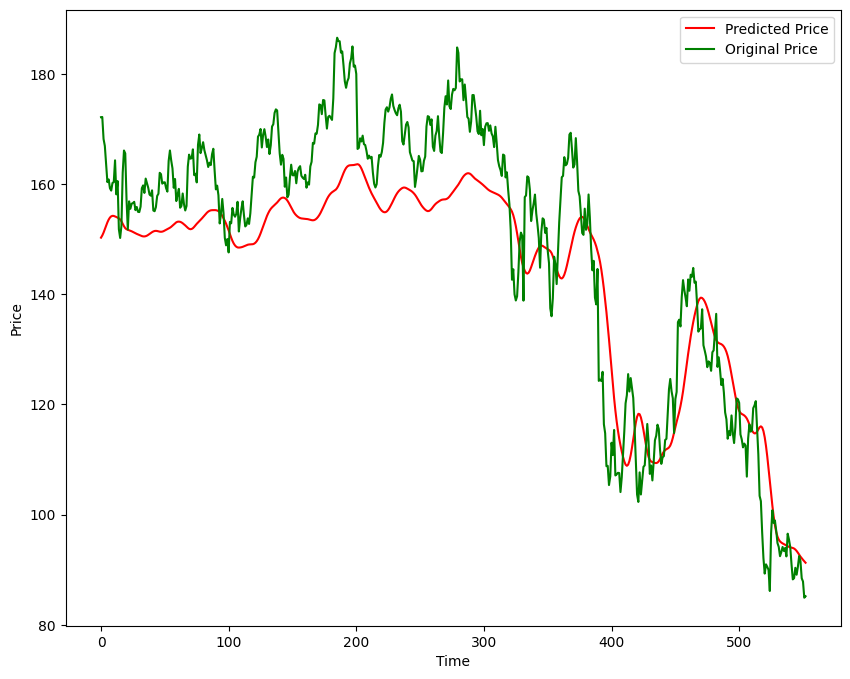

In [27]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Saving the model

model.save('Stock Predictions Model.keras')